# Material de apoio

## Estatística: frequências e medidas

### Importando as bibliotecas

In [4]:
from lerMicrodados import lerMicrodados
import pandas as pd
import numpy as np
import seaborn as sns

### Importando a base de dados

A base de dados pode ser encontrada no link: https://www.ibge.gov.br/estatisticas/sociais/populacao/19897-sintese-de-indicadores-pnad2.html?=&t=microdados
Ou seja, é um conjunto vindo do site do Instituto Brasileiro de Geografia e Estatística (IBGE).

Nesta página do IBGE, encontraremos os microdados. Adiante, teremos o acesso à pesquisa PNAD 2015 escolhida aqui, onde cada registro de um microdado é o resultado das próprias entrevistas realizadas.

A saber: A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento, habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

#### Dicionário de variáveis

*   **Renda** - Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade. -> V4718
*   **Idade** - Idade do morador na data de referência em anos. -> V8005
*   **Altura (elaboração própria)** - Altura do morador em metros.
*   **UF** - Código do estado do morador. -> 2 primeiros dígitos de V0102
*   **Sexo** - Sexo do morador (2 para homem e 4 para mulher). -> V0302
*   **Anos de estudo** - Codificação dos anos de estudo do morador. -> V4803
*   **Cor** - Codificação da cor/raça do morador. -> V0404
*   **Condição na unidade domiciliar** - Vou usar apenas os registros de pessoas de referência de cada domicílio. -> V0401

Segundo o dicionário de variáveis da PNAD:
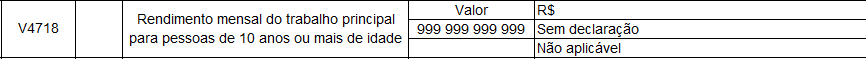



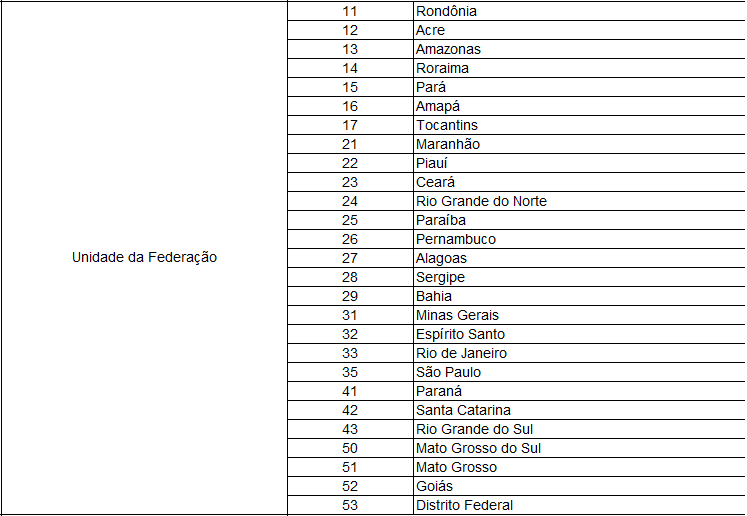

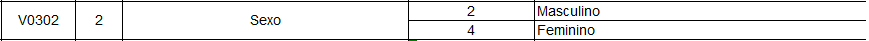



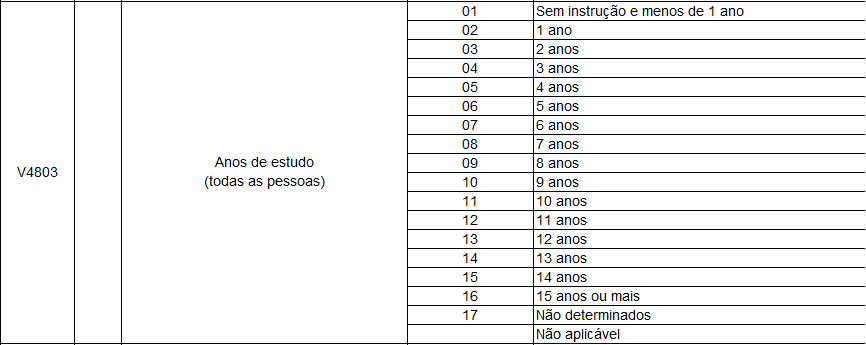

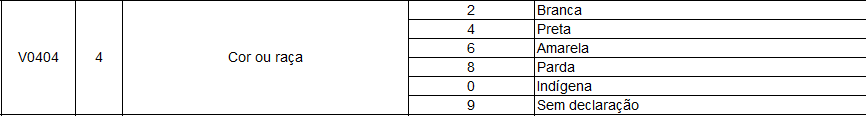

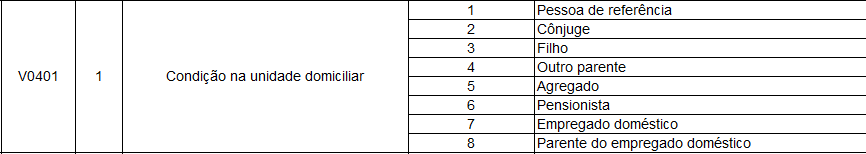

#### Transformando os arquivos dos microdados em uma planilha csv

https://medium.com/data-hackers/microdados-em-python-um-pacote-para-ler-dados-da-pnad-e-pof-e254cf18477d

In [5]:
#lerMicrodados.ler_PNAD('dados/Dados_20170517.zip', ano=2015, header=True)

#### Lendo a planilha

In [6]:
df = pd.read_csv('PES2015.csv')
df.head()

,V0101,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,V0401,...,V3628,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993
0,2015,11000015,1,1,2,27,2,1992,23,1,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,333.0,634.0,20170511
1,2015,11000015,3,1,4,4,5,1992,23,1,...,2.0,NaN,2.0,NaN,1.0,NaN,2.0,333.0,470.0,20170511
2,2015,11000015,4,1,4,4,1,1980,35,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
3,2015,11000015,4,2,2,5,6,1981,34,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
4,2015,11000015,4,3,4,8,4,2004,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511


### Selecionando as colunas da base de dados de acordo com o dicionário de variáveis

In [7]:
df = df[['V4718', 'V8005', 'V0102', 'V0302', 'V4803', 'V0404', 'V0401']]
df.head()

,V4718,V8005,V0102,V0302,V4803,V0404,V0401
0,800.0,23,11000015,2,12,8,1
1,1150.0,23,11000015,4,12,2,1
2,880.0,35,11000015,4,15,8,1
3,3000.0,34,11000015,2,15,8,2
4,NaN,11,11000015,4,4,8,3


### Criando a coluna UF
O código do estado do morador é os 2 primeiros dígitos de V0102, segundo o dicionário de variáveis.

In [8]:
df['UF'] = df['V0102'].apply(lambda x: str(x)[:2])
df.head()

,V4718,V8005,V0102,V0302,V4803,V0404,V0401,UF
0,800.0,23,11000015,2,12,8,1,11
1,1150.0,23,11000015,4,12,2,1,11
2,880.0,35,11000015,4,15,8,1,11
3,3000.0,34,11000015,2,15,8,2,11
4,NaN,11,11000015,4,4,8,3,11


### Renomeando as colunas e removendo a coluna V0102

In [9]:
df = df.rename(columns={'V4718': 'renda', 'V8005': 'idade', 'V0302': 'sexo','V4803': 'anos_estudo', 'V0404': 'cor', 'V0401': 'condicao'})
df = df.drop(columns=['V0102'])
df.head()

,renda,idade,sexo,anos_estudo,cor,condicao,UF
0,800.0,23,2,12,8,1,11
1,1150.0,23,4,12,2,1,11
2,880.0,35,4,15,8,1,11
3,3000.0,34,2,15,8,2,11
4,NaN,11,4,4,8,3,11


### Alguns tratamentos nos dados

Dadas algumas considerações sobre a variável *renda* no dicionário de variáveis, farei alguns tratamentos:
*   Eliminar os registros onde *renda* é inválida (999 999 999 999);
*   Eliminar os registros onde *renda* é missing;

Como vou usar apenas registros de pessoas de referência do domícilio, preciso filtrar o dataframe onde a coluna *condicao* é 1.

#### Renda inválida

In [10]:
df.renda.describe()

count    1.651930e+05
mean     1.299692e+10
std      1.132611e+11
min      0.000000e+00
25%      7.880000e+02
50%      1.000000e+03
75%      1.820000e+03
max      1.000000e+12
Name: renda, dtype: float64

In [11]:
df.query("renda == 999999999999")

,renda,idade,sexo,anos_estudo,cor,condicao,UF
91,1.000000e+12,36,2,12,8,1,11
498,1.000000e+12,60,4,12,2,2,11
639,1.000000e+12,24,2,12,2,3,11
961,1.000000e+12,26,4,7,8,2,11
1398,1.000000e+12,50,2,12,8,1,11
...,...,...,...,...,...,...,...
354450,1.000000e+12,45,2,12,2,2,53
354670,1.000000e+12,40,4,16,2,1,53
354671,1.000000e+12,42,2,16,2,2,53
356389,1.000000e+12,50,2,9,8,2,53


In [12]:
df = df.query("renda != 999999999999")
df.head()

,renda,idade,sexo,anos_estudo,cor,condicao,UF
0,800.0,23,2,12,8,1,11
1,1150.0,23,4,12,2,1,11
2,880.0,35,4,15,8,1,11
3,3000.0,34,2,15,8,2,11
4,NaN,11,4,4,8,3,11


In [13]:
df.renda.describe()

count    163046.000000
mean       1669.065380
std        2709.651405
min           0.000000
25%         788.000000
50%        1000.000000
75%        1800.000000
max      200000.000000
Name: renda, dtype: float64

#### Renda missing

In [14]:
df.renda.isna().sum()

191711

In [15]:
df[df.renda.isna()]

,renda,idade,sexo,anos_estudo,cor,condicao,UF
4,NaN,11,4,4,8,3,11
5,NaN,7,4,2,8,3,11
6,NaN,4,4,1,8,3,11
9,NaN,81,4,3,8,4,11
10,NaN,71,4,6,2,1,11
...,...,...,...,...,...,...,...
356894,NaN,57,4,1,8,1,53
356898,NaN,33,4,14,8,3,53
356900,NaN,39,4,7,8,2,53
356902,NaN,15,4,9,8,3,53


In [16]:
df = df.dropna(subset=['renda'])
df.head()

,renda,idade,sexo,anos_estudo,cor,condicao,UF
0,800.0,23,2,12,8,1,11
1,1150.0,23,4,12,2,1,11
2,880.0,35,4,15,8,1,11
3,3000.0,34,2,15,8,2,11
7,880.0,18,4,12,8,5,11


In [17]:
df.renda.isna().sum()

0

In [18]:
df.renda.describe()

count    163046.000000
mean       1669.065380
std        2709.651405
min           0.000000
25%         788.000000
50%        1000.000000
75%        1800.000000
max      200000.000000
Name: renda, dtype: float64

#### Considerando apenas pessoas de referência no domicílio

In [19]:
df.condicao.value_counts(normalize=True)

1    0.471278
2    0.259319
3    0.204991
4    0.055849
5    0.005876
6    0.001717
7    0.000932
8    0.000037
Name: condicao, dtype: float64

In [20]:
df = df.query("condicao == 1")
df.head()

,renda,idade,sexo,anos_estudo,cor,condicao,UF
0,800.0,23,2,12,8,1,11
1,1150.0,23,4,12,2,1,11
2,880.0,35,4,15,8,1,11
8,3500.0,46,2,6,2,1,11
11,150.0,47,4,9,8,1,11


In [21]:
df.condicao.value_counts(normalize=True)

1    1.0
Name: condicao, dtype: float64

#### Removendo a coluna *condicao*

In [22]:
df = df.drop(columns=['condicao'])
df.head()

,renda,idade,sexo,anos_estudo,cor,UF
0,800.0,23,2,12,8,11
1,1150.0,23,4,12,2,11
2,880.0,35,4,15,8,11
8,3500.0,46,2,6,2,11
11,150.0,47,4,9,8,11


In [23]:
df = df.reset_index(drop=True)
df.head()

,renda,idade,sexo,anos_estudo,cor,UF
0,800.0,23,2,12,8,11
1,1150.0,23,4,12,2,11
2,880.0,35,4,15,8,11
3,3500.0,46,2,6,2,11
4,150.0,47,4,9,8,11


### Tipos de dados

#### Variáveis qualitativas ordinais

Variáveis que representam um atributo, uma qualidade e que podem ser ordenadas ou hierarquizadas. Na nossa base, a coluna *anos_estudo*.

In [24]:
sorted(df['anos_estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#### Variáveis qualitativas nominais

Variáveis que representam um atributo, uma qualidade e que não podem ser ordenadas ou hierarquizadas.. Na nossa base, as colunas *sexo*, *cor* e *UF*

In [25]:
sorted(df['sexo'].unique())

[2, 4]

In [26]:
sorted(df['cor'].unique())

[0, 2, 4, 6, 8]

In [27]:
sorted(df['UF'].unique())

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '31',
 '32',
 '33',
 '35',
 '41',
 '42',
 '43',
 '50',
 '51',
 '52',
 '53']

#### Variáveis quantitativas discretas

Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável. Na nossa base, a coluna *idade*

In [28]:
df['idade'].describe()

count    76840.000000
mean        44.071421
std         12.480583
min         13.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         99.000000
Name: idade, dtype: float64

**Observação**: A variável *idade* pode ser classificada de três formas distintas, dependendo de como ela está no conjunto de dados:

*   **Quantitativa discreta** - quando representa anos completos (números inteiros);
*   **Quantitativa contínua** - quando representa a idade exata, sendo representada por frações de anos;
*   **Qualitativa ordinal** - quando representa faixas de idade.

#### Variáveis quantitativas contínuas

Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais). Na nossa base, a coluna *renda*.

In [29]:
df['renda'].describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: renda, dtype: float64

## Distribuição de frequências

Utilizando técnicas estatísticas, como as análises das distribuições de frequências e histogramas, podemos avaliar melhor a forma como as variáveis em estudo se distribuem.

### Distribuição de frequências para variáveis qualitativas

#### Método 1

Usando o método *value_counts*

In [30]:
df.sexo.value_counts()

2    53250
4    23590
Name: sexo, dtype: int64

Obtendo a proporção percentual

In [31]:
df.sexo.value_counts(normalize=True)

2    0.692998
4    0.307002
Name: sexo, dtype: float64

Pode parecer estranho termos 69% de homens e 31% de mulheres, pois isso não representa muito a realidade. Porém, devemos lembrar que filtramos o nosso conjunto de dados de forma a termos apenas os dados das pessoas de referência do domicílio. Parece que, nessa situação, temos mais homens do que mulheres.

In [32]:
freq_sexo = df.sexo.value_counts()
freq_sexo_perc = df.sexo.value_counts(normalize=True)

dist_freq_quali = pd.DataFrame({'frequencia': freq_sexo, 'porcentagem': freq_sexo_perc})
dist_freq_quali

,frequencia,porcentagem
2,53250,0.692998
4,23590,0.307002


Renomeando o index para ficar claro a linha do sexo masculino e a linha do sexo feminino.

In [33]:
dist_freq_quali.rename(index={2: 'Masculino', 4: 'Feminino'}, inplace=True)
dist_freq_quali.rename_axis('sexo', axis='columns', inplace=True)
dist_freq_quali

sexo,frequencia,porcentagem
Masculino,53250,0.692998
Feminino,23590,0.307002


#### Método 2

Usando o método *crosstab* do Pandas que faz o cruzamento entre variáveis.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [34]:
sexo = {
    2: 'Masculino',
    4: 'Feminino'
}

cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

In [35]:
freq = pd.crosstab(df.sexo, df.cor)
freq.rename(index=sexo, inplace=True)
freq.rename(columns=cor, inplace=True)
freq

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


Obtendo a proporção percentual

In [36]:
perc = pd.crosstab(df.sexo, df.cor, normalize=True) * 100
perc.rename(index=sexo, inplace=True)
perc.rename(columns=cor, inplace=True)
perc

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


Este método também permite que façamos agregações de acordo com uma determinada função usando outra variável dentro do cruzamento.

Calculando a renda média dentro do cruzamento entre sexo e cor

In [37]:
freq_mean = pd.crosstab(df.sexo, df.cor, aggfunc='mean', values=df.renda)
freq_mean.rename(index=sexo, inplace=True)
freq_mean.rename(columns=cor, inplace=True)
freq_mean

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Ou seja, as mulheres da cor branca, em média, recebem 2109 reais.

### Distribuição de frequências para variáveis quantitativas (classes personalizadas)

#### Passo 1 - Especificar os limites de cada classe

Vamos utilizar a seguinte classificação:

**A:** Acima de 20 SM

**B:** De 10 a 20 SM

**C:** De 4 a 10 SM

**D:** De 2 a 4 SM

**E:** Até 2 SM

onde **SM** é o valor do salário mínimo na época. Em nosso caso, **R$ 788,00** (2015), ou seja:

**A:** Acima de 15.760

**B:** De 7.880 a 15.760

**C:** De 3.152 a 7.880

**D:** De 1.576 a 3.152

**E:** Até 1.576

In [38]:
df.renda.min()

0.0

In [39]:
df.renda.max()

200000.0

In [40]:
classes_renda = [df.renda.min(), 1576, 3152, 7880, 15760, df.renda.max()]
classes_renda

[0.0, 1576, 3152, 7880, 15760, 200000.0]

In [41]:
labels_renda = ['E', 'D', 'C', 'B', 'A']

#### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [42]:
df.renda.head()

0     800.0
1    1150.0
2     880.0
3    3500.0
4     150.0
Name: renda, dtype: float64

In [43]:
freq_renda = pd.value_counts(
                pd.cut(x = df.renda,
                       bins = classes_renda,
                       labels = labels_renda,
                       include_lowest = True)
            )
freq_renda

E    49755
D    16700
C     7599
B     2178
A      608
Name: renda, dtype: int64

In [44]:
perc_renda = pd.value_counts(
                pd.cut(x = df.renda,
                       bins = classes_renda,
                       labels = labels_renda,
                       include_lowest = True),
                normalize = True
            )
perc_renda

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: renda, dtype: float64

In [45]:
dist_freq_quanti_personalizadas = pd.DataFrame({'frequencia': freq_renda, 'porcentagem': perc_renda})
dist_freq_quanti_personalizadas

,frequencia,porcentagem
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [46]:
dist_freq_quanti_personalizadas.sort_index(ascending=False, inplace=True)

In [47]:
dist_freq_quanti_personalizadas

,frequencia,porcentagem
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


### Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)

Quando não temos classes previamente organizadas. E classes de amplitude fixa significa classes de mesmo tamanho.

#### Passo 1 - Definir o número de classes

Usaremos a **Regra de Sturges** que otimiza a escolha da quantidade de classes que teremos nas tabelas de distribuições, considerando somente o número de observações que temos na variável.

Essa é a fórmula da **Regra de Sturges**:

# $$k = 1 + \frac {10}{3}\log_{10}n$$

Obtendo n:

In [48]:
n = df.shape[0]
n

76840

Aplicando a fórmula:

In [49]:
k = int(round(1 + (10/3)*np.log10(n)))
k

17

#### Passo 2 - Criar a tabela de frequências

In [50]:
freq_renda2 = pd.value_counts(
                pd.cut(
                    x = df.renda,
                    bins = k,
                    include_lowest=True
                ),
                sort = False
            )
freq_renda2

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: renda, dtype: int64

In [51]:
perc_renda2 = pd.value_counts(
                pd.cut(
                    x = df.renda,
                    bins = k,
                    include_lowest=True
                ),
                sort = False,
                normalize=True
            )
perc_renda2

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: renda, dtype: float64

In [52]:
dist_freq_quanti_ampli_fixa = pd.DataFrame({'frequencia': freq_renda2, 'porcentagem': perc_renda2})
dist_freq_quanti_ampli_fixa

,frequencia,porcentagem
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


## Histograma

O **Histograma** é a representação gráfica de uma distribuição de frequências. É um gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

Primeiramente, fazendo sem usar a densidade

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Idade'}, xlabel='Anos'>

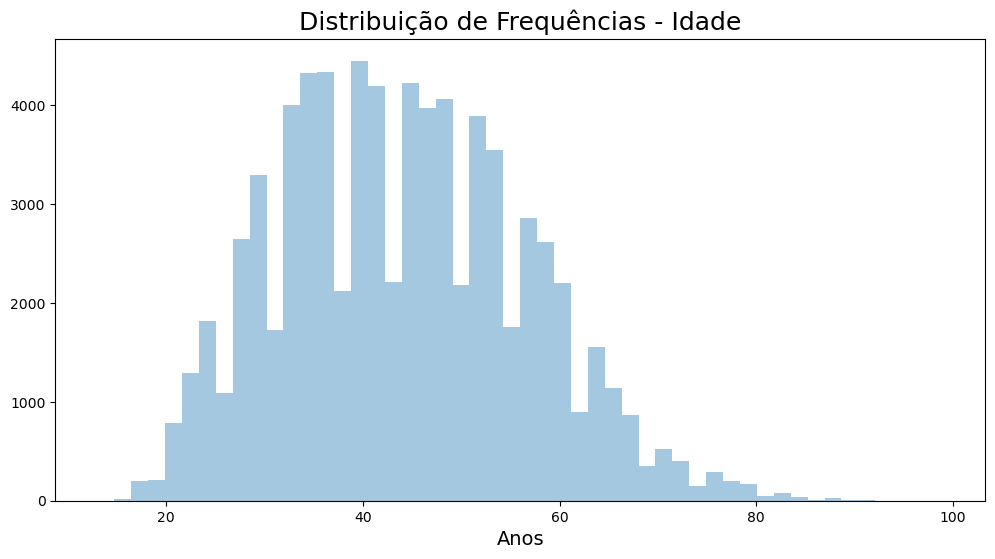

In [53]:
ax = sns.distplot(df.idade, kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

Usando a densidade

<AxesSubplot:title={'center':'Distribuição de Frequências - Idade'}, xlabel='Anos', ylabel='Density'>

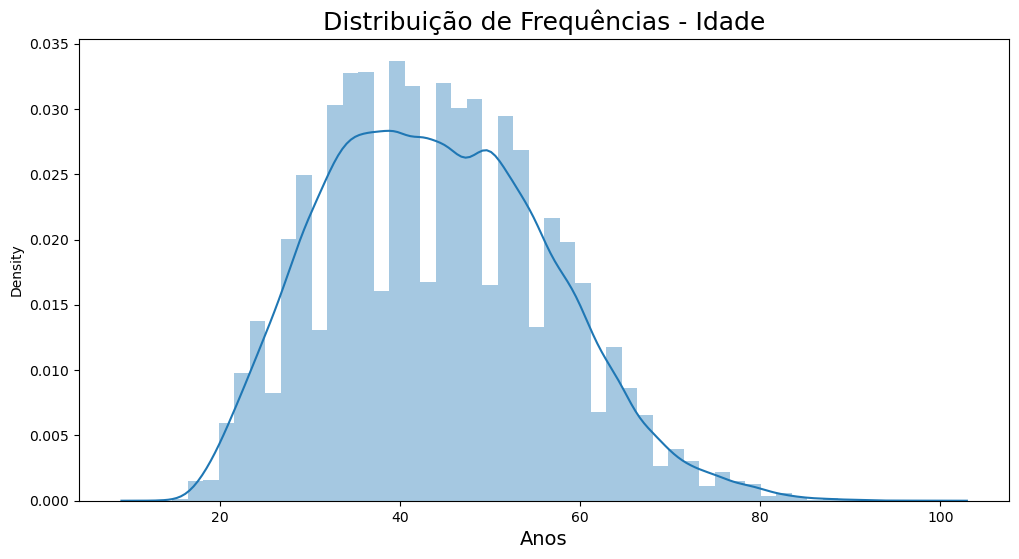

In [54]:
ax = sns.distplot(df.idade, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

Fazendo uma representação das classes personalizadas. Não vai ser um histograma propriamente dito, porém é uma representação parecida.

<AxesSubplot:>

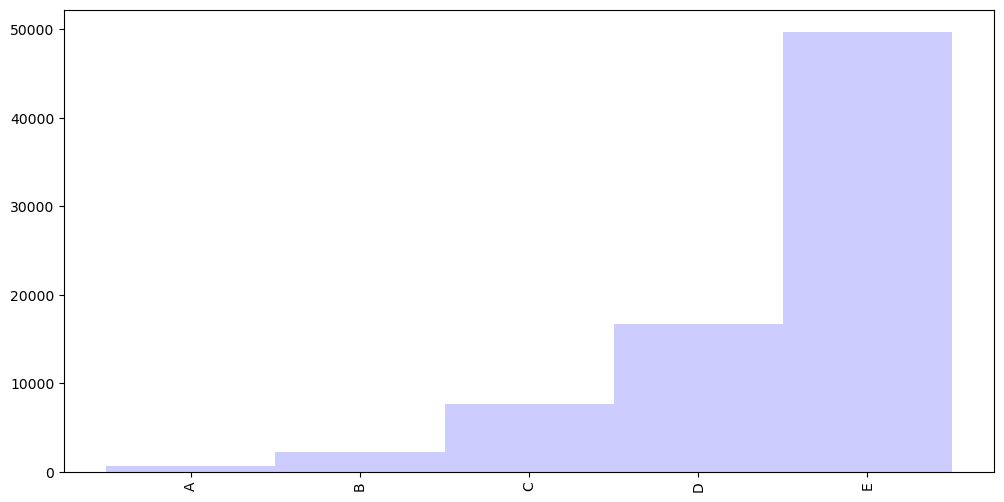

In [55]:
dist_freq_quanti_personalizadas['frequencia'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(12,6))

## Medidas de tendência central

### Média aritmética

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

A média é basicamente o centro de massa da distribuição de uma variável, equilibrando-a. Por ser muito sensível aos extremos, às vezes esta medida não é a mais indicada para representar algumas variáveis, justamente por conta desta sensibilidade.

#### Renda média do nosso conjunto de dados

In [56]:
df.renda.mean()

2000.3831988547631

Logo, a renda média do nosso conjunto de dados é 2000.38.

Não conseguimos calcular a média de algumas variáveis, por exemplo, a cor ou o sexo. Mas, podemos usar essas variáveis como agrupamento para calcular a média. Ou seja, podemos querer a renda média por sexo.

Para isso, vamos usar a função *groupby*

In [57]:
df.groupby(['sexo'])['renda'].mean()

sexo
2    2192.441596
4    1566.847393
Name: renda, dtype: float64

Logo, a renda média de pessoas do sexo masculino é 2192.44 e de pessoas do sexo feminino é 1566.84, nesse conjunto de dados.

### Mediana

Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados.

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

#### Obtendo a mediana da renda do nosso conjunto de dados

In [58]:
df.renda.median()

1200.0

Com o *quantile()* também conseguimos o valor da mediana.

In [59]:
df.renda.quantile()

1200.0

### Moda

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. É muito utilizada para dados qualitativos.

Podemos ter mais de uma moda em um mesmo conjunto de dados. Se tivermos duas modas, bimodal; se tivermos mais que duas, multimodal.

#### Obtendo a moda da renda do nosso conjunto de dados

In [60]:
df.renda.mode()

0    788.0
Name: renda, dtype: float64

Esse valor faz bastante sentido, dado que corresponde ao valor do salário mínimo da época (2015). Logo, a maioria das pessoas desse conjunto, recebem um salário mínimo.

#### Obtendo a moda da cor do nosso conjunto de dados

In [61]:
df.cor.mode()

0    8
Name: cor, dtype: int64

A maioria das pessoas desse conjunto de dados é parda.

### Relação entre as medidas de tendência central

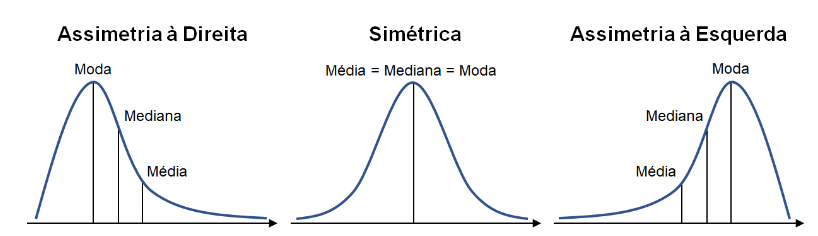

#### Avaliando a variável renda

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='renda', ylabel='Density'>

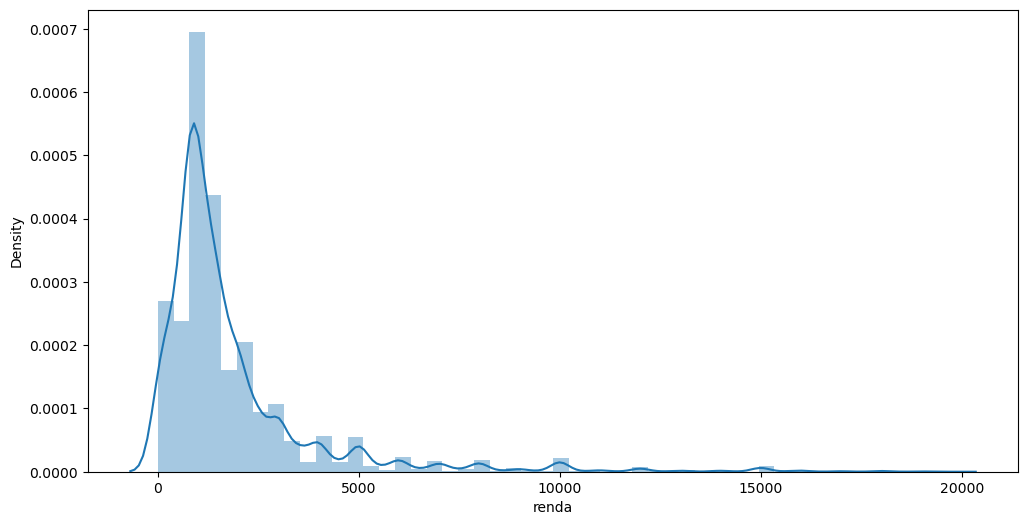

In [62]:
ax = sns.distplot(df.query('renda < 20000').renda) # filtrando, pois a pessoa que ganha 200000 está dificultando a visualização
ax.figure.set_size_inches(12,6)
ax

Pelo gráfico, vemos que é uma distribuição assimétrica à direita.

Vejamos os valores de média, mediana e moda.

In [63]:
media_renda = df.renda.mean()
media_renda

2000.3831988547631

In [64]:
mediana_renda = df.renda.median()
mediana_renda

1200.0

In [65]:
moda_renda = df.renda.mode()[0]
moda_renda

788.0

In [66]:
moda_renda < mediana_renda < media_renda

True

De fato, a renda possui uma distribuição assimétrica à direita.

#### Avaliando a variável anos de estudo

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='anos_estudo', ylabel='Density'>

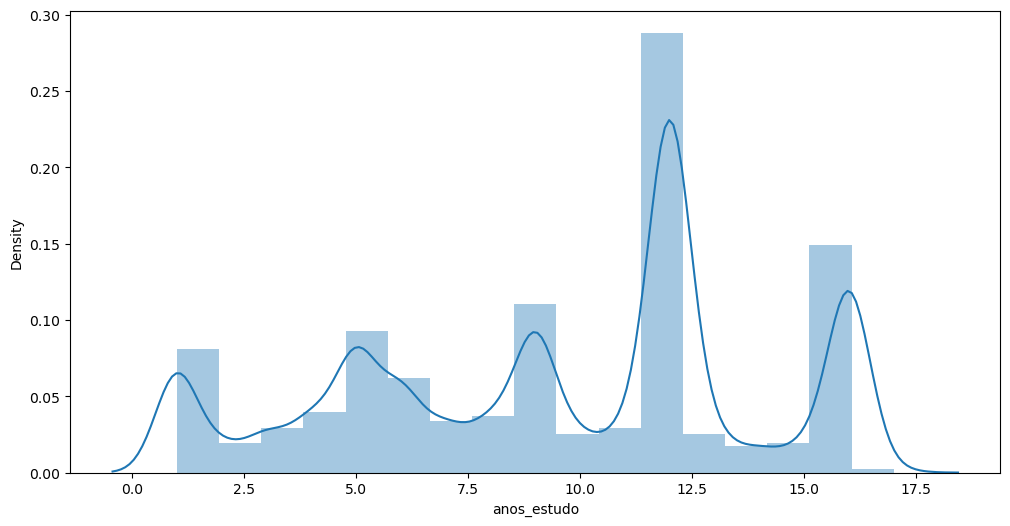

In [67]:
ax = sns.distplot(df.anos_estudo, bins=17) # filtrando, pois a pessoa que ganha 20000 está dificultando a visualização
ax.figure.set_size_inches(12,6)
ax

Obtemos um gráfico bastante irregular com picos e vales bastante acentuados e podemos interpretar de várias formas.

Se considerarmos somente os picos, encontraremos um comportamento bastante parecido com o padrão de assimetria à esquerda, pois os maiores picos aparecem conforme os valores do eixo "x" sobem.

In [68]:
media_anos_estudo = df.anos_estudo.mean()
media_anos_estudo

9.469664237376367

In [69]:
mediana_anos_estudo = df.anos_estudo.median()
mediana_anos_estudo

11.0

In [70]:
moda_anos_estudo = df.anos_estudo.mode()[0]
moda_anos_estudo

12

In [71]:
moda_anos_estudo < mediana_anos_estudo < media_anos_estudo

False

In [72]:
moda_anos_estudo > mediana_anos_estudo > media_anos_estudo

True

Logo, de fato, a variável anos de estudo possui uma distribuição assimétrica à esquerda.

## Medidas separatrizes

### Quartis, decis e percentis

Há uma série de medidas de posição semelhantes, na sua concepção, à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais; os decis, em dez partes iguais; e os centis, em cem partes iguais.

Estas medidas são interessantes porque não são influenciadas por valores extremos de uma distribuição, que é o caso da média.

Lembrando que para dividir em *n* partes iguais, precisamos de *n-1* divisores. Por exemplo, a mediana divide uma distribuição em duas partes iguais, logo precisa de 1 divisor.

#### Quartis

**1º quartil** - 25% dos dados ficam abaixo e 75% dos dados ficam acima do 1º quartil;

**2º quartil** - 50% dos dados ficam abaixo e 50% dos dados ficam acima do 2º quartil (mediana);

**3º quartil** - 75% dos dados ficam abaixo e 25% dos dados ficam acima do 3º quartil;

Como os quartis dividem a distribuição em 4 partes iguais, precisa de 4-1=3 divisores.

In [73]:
df.renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: renda, dtype: float64

#### Decis

Como os decis dividem a distribuição em 10 partes iguais, precisa de 9 divisores.

In [74]:
d = [i/10 for i in range(1,10)]
d

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [75]:
df.renda.quantile(d)

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: renda, dtype: float64

#### Percentis

Como os percentis dividem a distribuição em 100 partes iguais, precisa de 99 divisores.

In [76]:
p = [i/100 for i in range(1,100)]
p[:15]

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15]

In [77]:
df.renda.quantile(p)

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: renda, Length: 99, dtype: float64

#### Uma representação gráfica de uma distribuição de frequências acumulada - Idade

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Anos', ylabel='Acumulado'>

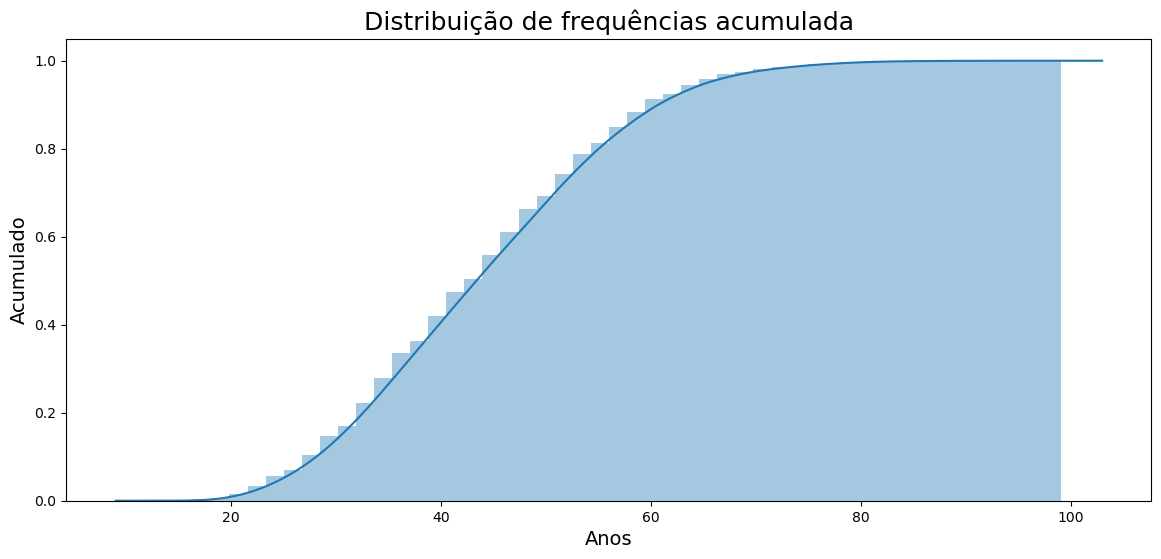

In [78]:
ax = sns.distplot(df.idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

Alterando o bins para 10 e comparando com os decis da idade

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Anos', ylabel='Acumulado'>

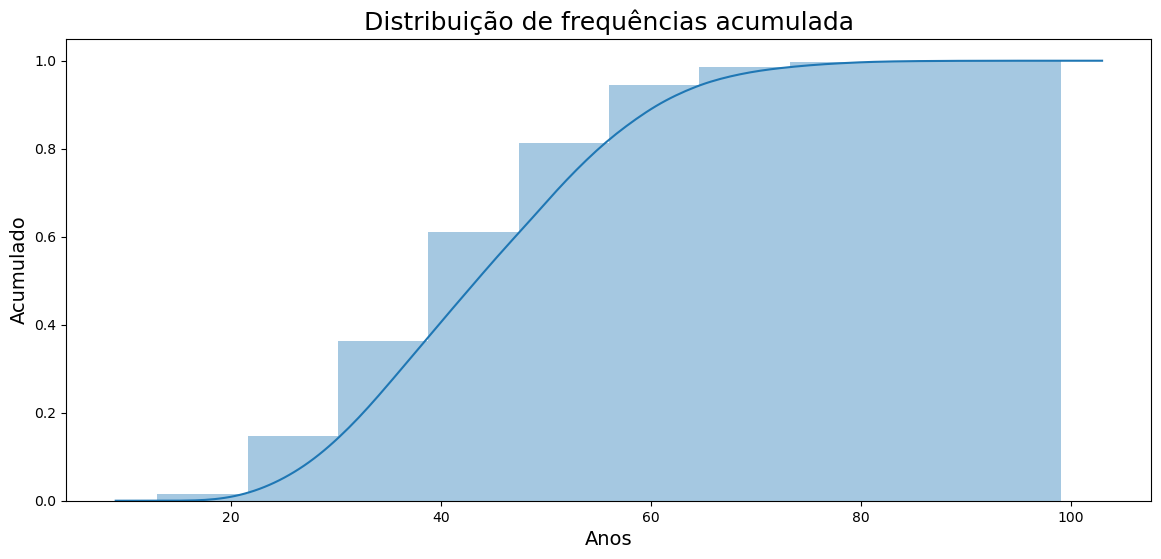

In [79]:
ax = sns.distplot(df.idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, bins=10)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

In [80]:
df.idade.quantile(d)

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: idade, dtype: float64

Repare que, segundo os decis, 40% da população desse conjunto de dados possui até 40 anos. E conseguimos ver isso no gráfico de frequências acumulada também.

### Boxplot

O boxplot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

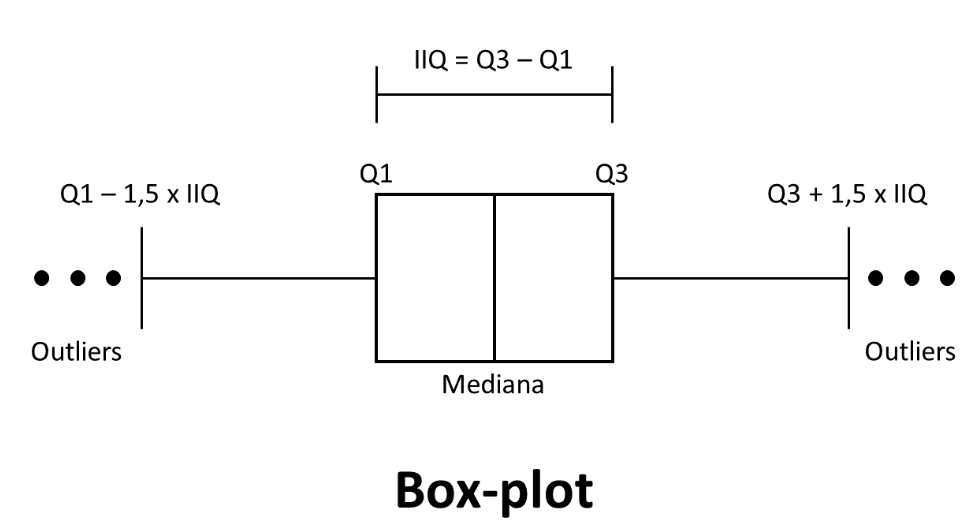

O $Q1$ representa o primeiro quartil de 25%, teremos a mediana ao meio e o terceiro quartil representado por $Q3$. A diferença entre os dois é o índice interquartil $IIQ$.

Os extremos da representação gráfica são construídos como $Q1 - 1,5(IIQ)$ e $Q3 + 1,5(IIQ)$ respectivamente.

O $IIQ$ é uma informação de dispersão de dados. Abaixo do primeiro limite e após o segundo, teremos candidatos a dados discrepantes, o que não significa que são outliers de imediato (como diz a imagem acima).

#### Boxplot da renda

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

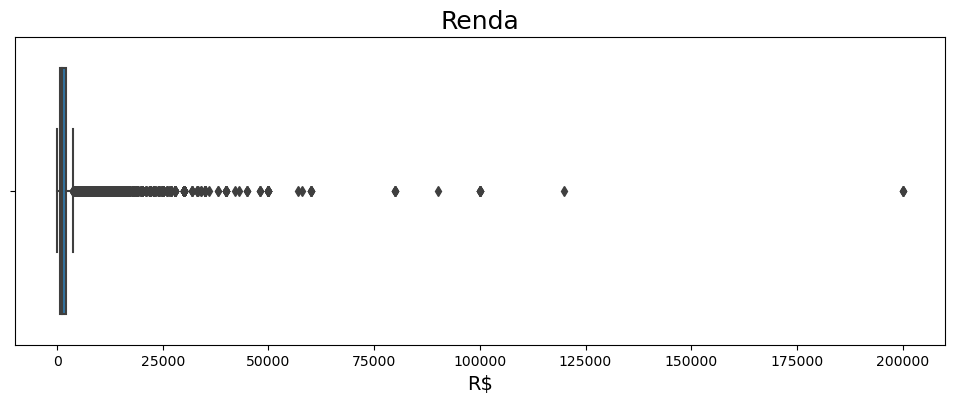

In [81]:
ax = sns.boxplot(x='renda', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

Nem dá pra ver o boxplot direito, dado a assimetria à direita dos dados devido àquela pessoa que possui 200.000 de renda.

#### Filtrando os dados de forma a vermos melhor o boxplot

Visualizando o boxplot para os casos onde a renda é menor que 10000

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

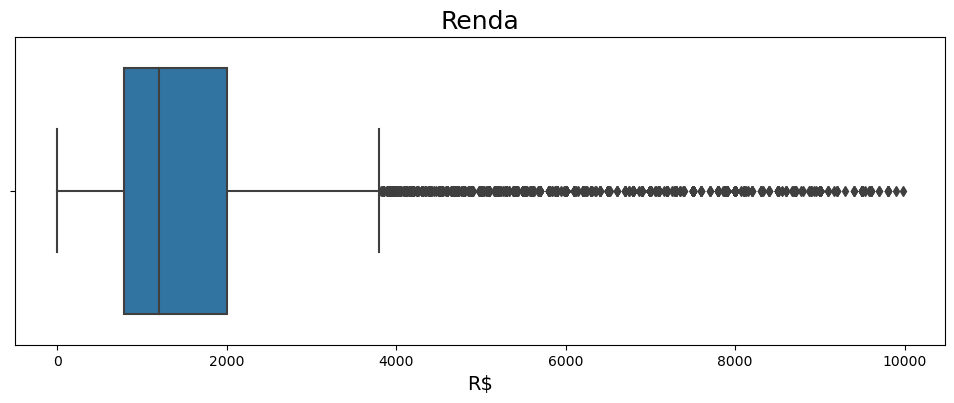

In [82]:
ax = sns.boxplot(x='renda', data=df.query('renda < 10000'), orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

Melhorou a visualização do boxplot e ainda conseguimos ver o quão assimétrico são os dados.

#### Boxplot da renda por sexo, com o filtro

Lembrando que 2 representa homem e 4 representa mulher.

In [83]:
df['sexo_mapeado'] = df['sexo'].map(sexo)

<AxesSubplot:title={'center':'Renda por sexo'}, xlabel='R$', ylabel='Sexo'>

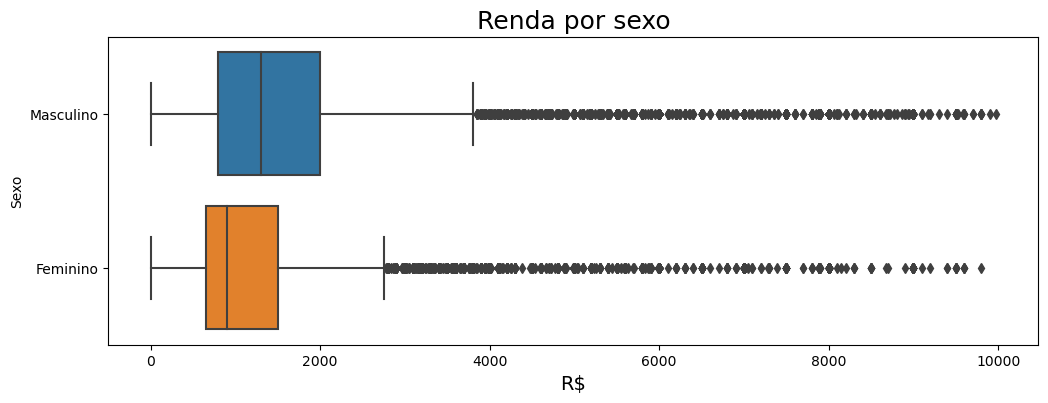

In [84]:
ax = sns.boxplot(x='renda', y='sexo_mapeado', data=df.query('renda < 10000'), orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda por sexo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Sexo')
ax

Observe a diferença por nível de renda por sexo.

Note que mulheres possuem 1º quartil, mediana, 3º quartil e valores extremos menores que os homens. Lembrando que aqui estamos considerando apenas pessoas de referência das famílias pesquisadas.

#### Boxplot dos anos de estudo

<AxesSubplot:title={'center':'Anos de estudo'}, xlabel='Anos'>

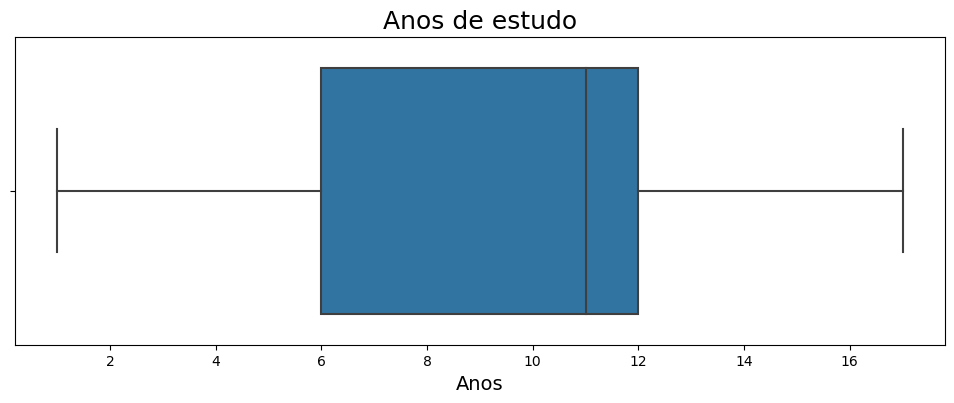

In [85]:
ax = sns.boxplot(x='anos_estudo', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Anos de estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

Observe que possuímos uma assimetria à esquerda.

#### Boxplot dos anos de estudo por sexo

<AxesSubplot:title={'center':'Anos de estudo por sexo'}, xlabel='Anos', ylabel='Sexo'>

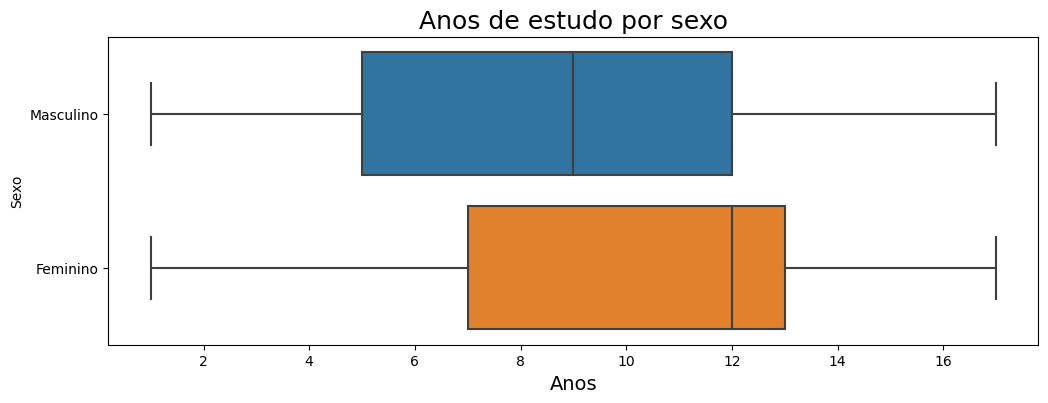

In [86]:
ax = sns.boxplot(x='anos_estudo', y='sexo_mapeado', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Anos de estudo por sexo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Sexo')
ax

Observe que as mulheres que são referência possuem mais anos de estudo que os homens.

Podemos notar a relação entre os gráficos boxplot e os de assimetria à direita, simetria e assimetria à esquerda, pois possuem os mesmos comportamentos.

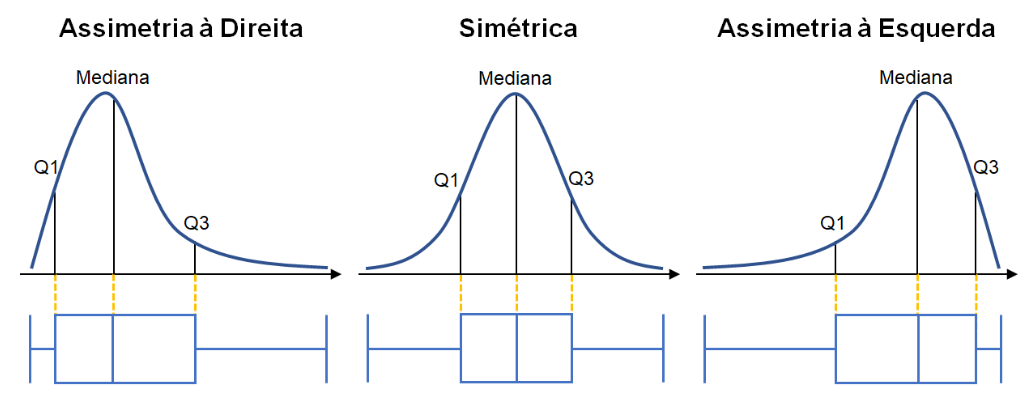

## Medidas de dispersão

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

### Desvio médio absoluto

# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$

$DM$ é igual ao somatório dos desvios, formado pelo módulo de $X$ índice $i$ que é o valor de cada valor do df menos a média geral $X$. A última parte entre barras significa que pegaremos os valores absolutos dessa operação. (Ou seja, se der 8 - 10 = -2, pegaremos 2).

OBS.: Pegamos os valores absolutos, pois a soma dos desvios é igual a zero. Logo, para não ficar 0/n, pegamos os valores absolutos.

#### Verificando o desvio médio absoluto da renda

In [87]:
desvio_medio_absoluto = df.renda.mad()
desvio_medio_absoluto

1526.4951371644931

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado (dessa forma, também evitamos o problema da soma dos desvios ser igual a 0.

Temos diferenças para calcularmos dados populacionais e amostrais. No caso da estatística, geralmente trabalhamos com amostras.

#### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

#### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

#### Verificando a variância amostral da renda

In [88]:
variancia = df.renda.var()
variancia

11044906.00622118

Como elevamos os desvios ao quadrado, também elevamos as unidades da variância; suporemos que estamos calculando a altura em metros de uma amostra. Como resultado, obteremos em metros ao quadrado, o qual é uma unidade de área, tornando mais difícil a interpretação dos dados.

Para resolver este problema, temos o desvio padrão.

### Desvio padrão

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

#### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

#### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

#### Verificando o desvio padrão amostral da renda

In [89]:
desvio_padrao = df.renda.std()
desvio_padrao

3323.3877303470294